# Data Aquisition



In [10]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    print("Downloading...")
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    print("Extracting...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()


## Run the following code in your terminal window to install required packages

```
conda install -c conda-forge opencv
```

and then 

```
conda install -c conda-forge pathlib
```


In [ ]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

Extracting...


# Problem Formulation 

With this numerical data, we find that the folder is split into two categories - cats and dogs. Since this data is appropriately grouped, we can use this data for classification purposes. Once we train our model, we can use it to discern images based on their properties.


# Preprocessing

Once retrieving the data, we now want to store these images with a numerical representation. Since they are .JPG files, we can decompose them into 3 matrices representing the levels of intensity of red, green, and blue. This is known as an RGB Tensor.

In [46]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder_path = "cats_and_dogs_filtered/train"

sub_directories = ["cats", "dogs"]
size = 128 #adjusting pixel size 

tensors = [] #storing image as 3d tensor
classification = [] # 1 for dog & 0 for cat


for label, directory in enumerate(sub_directories):
    sub_folder_path = os.path.join(folder_path, directory)
    for filename in os.listdir(sub_folder_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(sub_folder_path, filename)
            img = cv2.imread(image_path)
            if img is None:
                print(f"{filename} not found")
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (size, size))
            tensor = img_resized.astype('float32') / 255.0
            tensors.append(tensor)
            classification.append(label)  # 0 for cat, 1 for dog

tensors = np.array(tensors)
classification = np.array(classification)

print(f"tensor shape: {tensors.shape}")

tensor shape: (2000, 128, 128, 3)


We can display these images based on their classification value. Let's start by displaying a randomly chosen dog along with its numerical description.

Tensor array for dog.778.jpg:
[[[0.26666668 0.39215687 0.12941177]
  [0.21960784 0.34117648 0.06666667]
  [0.4627451  0.5803922  0.2901961 ]
  ...
  [0.2784314  0.50980395 0.5803922 ]
  [0.26666668 0.49411765 0.54901963]
  [0.15686275 0.36862746 0.41568628]]

 [[0.07450981 0.20392157 0.        ]
  [0.3137255  0.44705883 0.15686275]
  [0.5372549  0.65882355 0.36078432]
  ...
  [0.28235295 0.5137255  0.58431375]
  [0.2784314  0.5058824  0.56078434]
  [0.16862746 0.3764706  0.43137255]]

 [[0.27450982 0.41960785 0.11764706]
  [0.03137255 0.16470589 0.        ]
  [0.56078434 0.68235296 0.36862746]
  ...
  [0.27450982 0.5019608  0.5803922 ]
  [0.2627451  0.4862745  0.5529412 ]
  [0.15294118 0.36078432 0.42352942]]

 ...

 [[0.77254903 0.9019608  0.5921569 ]
  [0.78039217 0.9098039  0.5921569 ]
  [0.5803922  0.7176471  0.3882353 ]
  ...
  [0.49411765 0.6156863  0.3019608 ]
  [0.47058824 0.6039216  0.23529412]
  [0.7137255  0.85490197 0.43137255]]

 [[0.6666667  0.7921569  0.49803922]
  [0.81

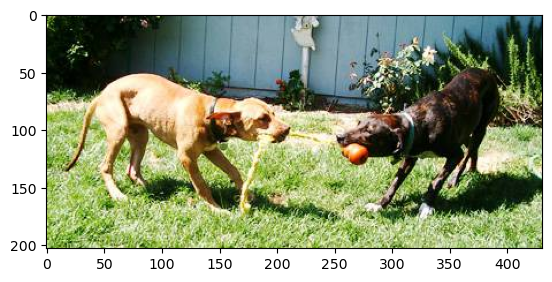

In [74]:
import random 

number = random.randint(0,999)
dog_folder = 'cats_and_dogs_filtered/train/dogs'
iteration = 0

file_choice = dog_folder + "/dog." + str(number) + ".jpg"

img = cv2.imread(file_choice)
if img is None:
    print(f"Warning: Unable to read {file_choice}")

    # Convert BGR to RGB
img_dog = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to tensor (normalized float32 numpy array)
tensor = img_dog.astype('float32') / 255.0

    # Print the tensor array
print(f"Tensor array for {filename}:")
print(tensor)
print(f"Shape: {tensor.shape}, dtype: {tensor.dtype}")

            # Optionally, display the image and tensor side by side
plt.imshow(img_dog)
plt.show()
        





Now... let's display some cats!

Tensor array for dog.778.jpg:
[[[0.91764706 0.6        0.42352942]
  [0.93333334 0.6156863  0.4392157 ]
  [0.9529412  0.63529414 0.45882353]
  ...
  [0.7529412  0.50980395 0.42745098]
  [0.7529412  0.50980395 0.42745098]
  [0.7529412  0.50980395 0.42745098]]

 [[0.89411765 0.5764706  0.40784314]
  [0.9137255  0.59607846 0.41960785]
  [0.93333334 0.6156863  0.44705883]
  ...
  [0.7529412  0.50980395 0.42745098]
  [0.7529412  0.50980395 0.42745098]
  [0.7529412  0.50980395 0.42745098]]

 [[0.84705883 0.5372549  0.3764706 ]
  [0.8745098  0.5647059  0.39607844]
  [0.9019608  0.5921569  0.43137255]
  ...
  [0.75686276 0.5137255  0.43137255]
  [0.75686276 0.5137255  0.43137255]
  [0.75686276 0.5137255  0.43137255]]

 ...

 [[0.01960784 0.02352941 0.04313726]
  [0.02352941 0.01960784 0.03921569]
  [0.03529412 0.01960784 0.02352941]
  ...
  [0.91764706 0.7647059  0.69803923]
  [0.93333334 0.78039217 0.7137255 ]
  [0.9411765  0.7882353  0.72156864]]

 [[0.01960784 0.02352941 0.04313726]
  [0.02

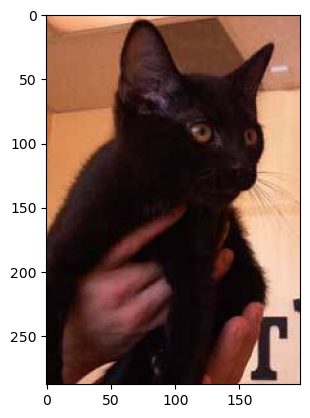

In [75]:
import random 

new_number = random.randint(0,999)
cat_folder = 'cats_and_dogs_filtered/train/cats'
iteration = 0

file_choice = cat_folder + "/cat." + str(new_number) + ".jpg"

img_cat = cv2.imread(file_choice)
if img is None:
    print(f"Warning: Unable to read {file_choice}")

    # Convert BGR to RGB
img_rgb = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)

    # Convert to tensor (normalized float32 numpy array)
tensor = img_rgb.astype('float32') / 255.0

    # Print the tensor array
print(f"Tensor array for {filename}:")
print(tensor)
print(f"Shape: {tensor.shape}, dtype: {tensor.dtype}")

            # Optionally, display the image and tensor side by side
plt.imshow(img_rgb)
plt.show()

A .JPG file is composed of 3 matrices (188x188) x 3 to describe the intensity values of red, blue, and green in the image. To improve computational complexity, we will turn the image greyscale so it is composed of a (188 x 188) x 1 image

Dimensions of cat image: (288, 198, 3)
shape of grayscale pic =  (288, 198)


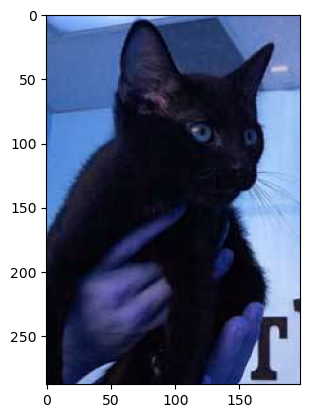

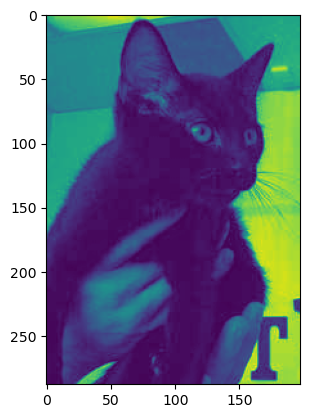

In [ ]:
print("Dimensions of cat image: " + str(img_cat.shape))

grayscale_cat = gray = cv2.cvtColor(img_cat,cv2.COLOR_RGB2GRAY)


print("Dimensions of grayscale pic = ", grayscale_cat.shape)

plt.imshow(img_cat)         #Figure_1
plt.show()
plt.imshow(grayscale_cat)   #Figure_2
plt.show()


We can do the same for the images of the dogs.

Dimensions of cat image: (203, 431, 3)
shape of grayscale pic =  (203, 431)


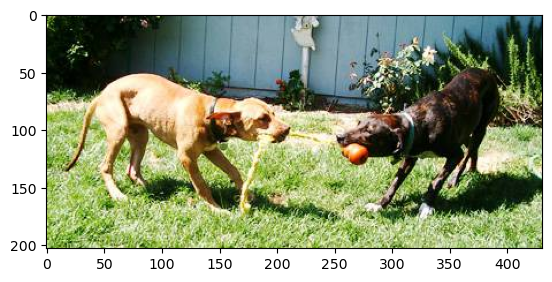

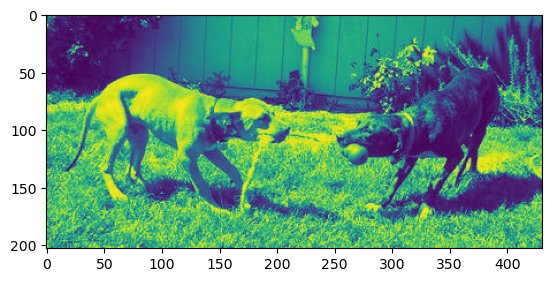

In [ ]:
print("Dimensions of cat image: " + str(img_dog.shape))

grayscale_dog = gray = cv2.cvtColor(img_dog,cv2.COLOR_RGB2GRAY)


print("Dimensions of grayscale pic = ", grayscale_dog.shape)

plt.imshow(img_dog)         #Figure_1
plt.show()
plt.imshow(grayscale_dog)   #Figure_2
plt.show()

# Data Processing (II)

The next stage in image processing is Feature Learning. This process is broken down into three distinct steps

## Convolution:

We apply a kernel (2 Dimensional Matrix) of weights 

![](https://miro.medium.com/v2/resize:fit:1358/1*D6iRfzDkz-sEzyjYoVZ73w.gif)
